<div style="font-family: Arial; color: #5DADE2; text-align: center; font-size: 36px;">
    <i>Compte Rendu TP 2 Atelier ML</i>
    </br>
    </br>
    <i>Etude de Cas</i>
</div>
<div style="font-family: Arial; color: #27AE60 ; font-size: 20px;">
    <b>Réalisé Par:</b>
</div>
<ul style="font-family: Arial; color: #2E86C1 ; font-size: 18px;">
    <li>Ouhibi Ons</li>
    <li>Ben Zaied Mouna</li>
</ul>
<div style="font-family: Arial; color: #27AE60 ; text-align: left; padding-left: 20px; font-size: 15px;">
    <b>RT4 Groupe 2</b>
</div>


</br>
<div style="font-family: Arial; color: black ; font-size: 20px;">
    <b>On s'interesse à la visualisation de la dataset "Ticket Management Dataset- Cybersecurity"  </b>
</div>
</br>



In [1]:
!pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import openpyxl
import datetime
import seaborn as sns  


In [2]:
df = pd.read_excel('Ticket Details.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ticket No        627 non-null    object        
 1   Priority         627 non-null    object        
 2   State            627 non-null    object        
 3   Category         627 non-null    object        
 4   Sub Category     627 non-null    object        
 5   Skill Team       627 non-null    object        
 6   Hosting          627 non-null    object        
 7   Create Date      627 non-null    datetime64[ns]
 8   Picked Date      627 non-null    datetime64[ns]
 9   Completed Date   627 non-null    object        
 10  Assignee         627 non-null    object        
 11  Customer Rating  627 non-null    object        
 12  Outcome          627 non-null    object        
 13  Escalated        59 non-null     object        
 14  Reached via      627 non-null    object   

In [3]:
df.sample(10)


,Ticket No,Priority,State,Category,Sub Category,Skill Team,Hosting,Create Date,Picked Date,Completed Date,Assignee,Customer Rating,Outcome,Escalated,Reached via
156,T233,Low,California,Cyber Consultation,Database Security,IT,On Prem Server,2021-05-13 21:53:10,2021-05-13 21:54:06,2021-05-17 18:36:34,Charlotte,Excellent (5),Advised for a risk assessment,NaN,Mail
25,T114,Low,California,Cyber Consultation,BCP/DR,Marketing,Vendor Cloud,2021-03-31 11:13:11,2021-03-31 11:13:42,2021-03-31 11:38:41,Allan,Satisfactory (3),Resolved,NaN,Ticket Portal
72,T157,Medium,North Carolina,Data Privacy,PCI-DSS,IT,Vendor Cloud,2021-04-21 11:45:29,2021-04-21 11:45:51,2021-04-22 14:50:54,Kareema,Excellent (5),Recommended Threat Assessment,NaN,Ticket Portal
158,T235,Low,Ohio,Data Leak,Phishing,HR,On Prem Server,2021-05-17 09:56:50,2021-05-17 09:57:11,2021-05-17 09:58:19,Benny,Excellent (5),Resolved,NaN,Ticket Portal
502,T548,High,Ohio,Data Leak,Phishing,IT,On Prem Server,2021-10-28 03:12:39,2021-10-28 09:42:46,2021-11-05 17:39:37,Sean,Unsatisfactory (2),Resolved,NaN,Ticket Portal
3,T04,Low,New York,Security Gap,Password non-expiry,IT,On Prem Server,2021-01-04 10:55:13,2021-01-04 10:55:31,2021-01-18 11:06:54,Allan,Excellent (5),Advised for a risk assessment,NaN,Ticket Portal
444,T495,Low,District of Columbia,Data Privacy,HIPAA,Finance,On Prem Server,2021-09-23 22:31:47,2021-09-24 11:04:02,2021-09-28 15:47:16,Sebastian,Excellent (5),Resolved,NaN,Ticket Portal
115,T196,Low,Minnesota,Cyber Consultation,BCP/DR,IT,On Prem Server,2021-05-04 09:52:44,2021-05-04 10:12:46,2021-05-17 09:44:31,Bob,Excellent (5),Recommended Threat Assessment,NaN,Ticket Portal
309,T372,High,Pennsylvania,Cyber Security Breach,Spyware,HR,On Prem Server,2021-07-29 18:53:36,2021-07-29 18:55:17,2021-08-16 18:24:43,Sebastian,Satisfactory (3),Advised for a risk assessment,NaN,Ticket Portal
590,T63,Medium,New York,Data Leak,Insider Threat,Marketing,Vendor Cloud,2021-02-17 21:07:22,2021-02-17 21:17:00,2021-07-13 18:57:52,Martina,Unsatisfactory (2),Resolved,Yes,Ticket Portal


In [4]:
df.isnull().sum()


Ticket No            0
Priority             0
State                0
Category             0
Sub Category         0
Skill Team           0
Hosting              0
Create Date          0
Picked Date          0
Completed Date       0
Assignee             0
Customer Rating      0
Outcome              0
Escalated          568
Reached via          0
dtype: int64

In [5]:
df['Escalated'].unique() # la colonne de 'Excalated' a des valeurs NaN

array([nan, 'Yes', 'No'], dtype=object)

In [6]:
# Trouver la valeur most frequent dans la colonne Escalated
most_frequent_value = df['Escalated'].mode()[0]

# Fill missing values with the most frequent value
df['Escalated'].fillna(most_frequent_value, inplace=True)

# Check unique values in the 'Escalated' column after filling missing values
print(df['Escalated'].unique())


['Yes' 'No']


In [7]:
df.sample(10)
#La colonne Escalated est maintenant remplie par le most frequent

,Ticket No,Priority,State,Category,Sub Category,Skill Team,Hosting,Create Date,Picked Date,Completed Date,Assignee,Customer Rating,Outcome,Escalated,Reached via
347,T407,Medium,Georgia,Data Privacy,HIPAA,IT,Vendor Cloud,2021-08-13 17:30:12,2021-08-13 22:27:06,2021-08-16 23:06:49,Martina,Unsatisfactory (2),Resolved,Yes,Ticket Portal
625,T98,High,Virginia,Cyber Consultation,BCP/DR,IT,On Prem Server,2021-03-12 17:45:32,2021-03-12 17:46:30,2021-03-13 11:45:18,Kareema,Good (4),Advised for a risk assessment,Yes,Ticket Portal
100,T182,Low,Illinois,Data Privacy,HIPAA,Finance,On Prem Server,2021-04-28 22:17:54,2021-04-28 22:19:59,2021-05-04 16:20:45,Sean,Unsatisfactory (2),Resolved,Yes,Personal Call
6,T07,High,Texas,Cyber Consultation,Application Offboarding,Marketing,On Prem Server,2021-01-05 21:27:59,2021-01-05 21:45:26,2021-01-07 20:14:33,Martina,Good (4),Advised for a risk assessment,Yes,Personal Call
397,T452,Low,Oklahoma,Data Leak,Vishing,Marketing,Vendor Cloud,2021-08-28 01:07:28,2021-08-30 10:09:50,2021-09-03 19:46:02,Charles,Good (4),Resolved,Yes,Mail
241,T310,High,Virginia,Cyber Security Breach,Malware Attack,IT,On Prem Cloud,2021-06-23 13:30:57,2021-06-23 13:31:14,2021-06-23 13:32:19,Michael,Satisfactory (3),Advised for a risk assessment,Yes,Ticket Portal
324,T386,Low,Idaho,Data Privacy,PCI-DSS,HR,On Prem Cloud,2021-08-04 22:54:51,2021-08-05 12:30:02,2021-08-22 19:09:38,Bob,Excellent (5),Resolved,Yes,Mail
141,T22,High,Florida,Cyber Security Breach,Malware Attack,Finance,On Prem Server,2021-01-11 18:15:29,2021-01-11 18:15:52,2021-01-13 11:10:23,Benny,Excellent (5),Recommended Threat Assessment,Yes,Mail
479,T527,High,Maryland,Cyber Security Breach,Firewall,Finance,On Prem Server,2021-10-13 18:12:50,2021-10-13 18:56:01,2021-10-13 18:56:01,Sean,Satisfactory (3),Advised for a risk assessment,Yes,Ticket Portal
94,T177,High,Kansas,Security Gap,Password non-expiry,HR,Vendor Cloud,2021-04-28 21:21:24,2021-04-28 21:24:34,2021-04-30 18:00:53,Martina,Good (4),Advised for a risk assessment,Yes,Personal Call


</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Affichage des tickets par Priorité </b>
</div>
</br>

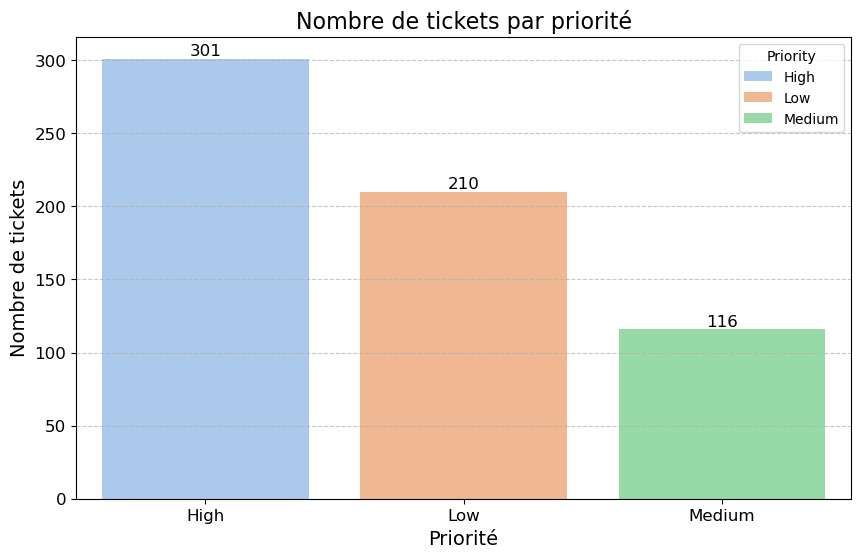

In [8]:
# Supposons que df est votre DataFrame contenant les données
priority_group = df.groupby('Priority')['Ticket No'].count().sort_values(ascending=False).reset_index()

# Utilisation d'une palette de couleurs personnalisée
custom_colors = sns.color_palette('pastel', n_colors=len(priority_group))

# Tracé avec Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Priority', y='Ticket No', data=priority_group, hue='Priority', palette=custom_colors, dodge=False)

# Boucle pour ajouter des étiquettes aux barres
for index, row in priority_group.iterrows():
    ax.text(row.name, row['Ticket No'], f"{row['Ticket No']:,}", ha='center', va='bottom', fontsize=12)

# Personnalisation du graphique
plt.title("Nombre de tickets par priorité", fontsize=16)
plt.xlabel("Priorité", fontsize=14)
plt.ylabel("Nombre de tickets", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()





</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Affichage des tickets par Catégorie </b>
</div>
</br>


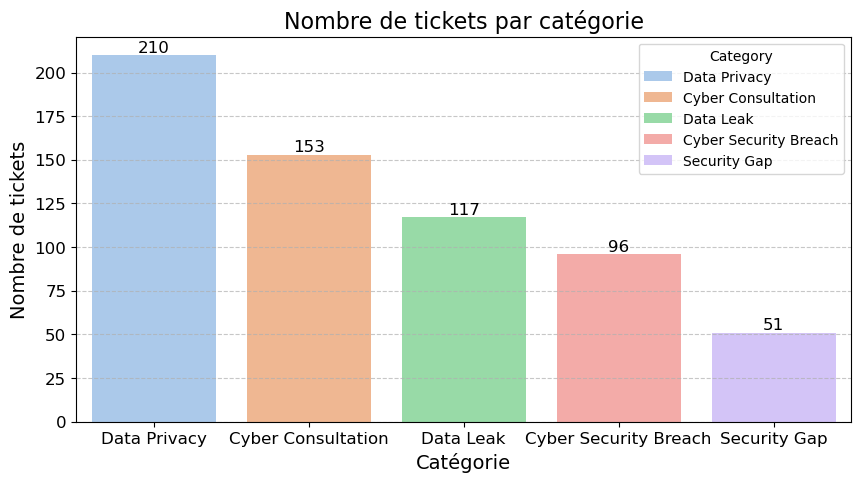

In [9]:
# Supposons que category_group est le DataFrame regroupé
category_group = df.groupby('Category')['Ticket No'].count().sort_values(ascending=False).reset_index()

# Utilisation d'une palette de couleurs personnalisée
custom_colors = sns.color_palette('pastel', n_colors=len(category_group))

# Tracé avec Seaborn
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Category', y='Ticket No', data=category_group, hue='Category', palette=custom_colors, dodge=False)

# Ajout d'étiquettes aux barres
for index, row in category_group.iterrows():
    ax.text(row.name, row['Ticket No'], row['Ticket No'], ha='center', va='bottom', fontsize=12)

# Personnalisation du graphique
plt.title("Nombre de tickets par catégorie", fontsize=16)
plt.xlabel("Catégorie", fontsize=14)
plt.ylabel("Nombre de tickets", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()


</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Affichage des tickets par sous-catégorie </b>
</div>
</br>


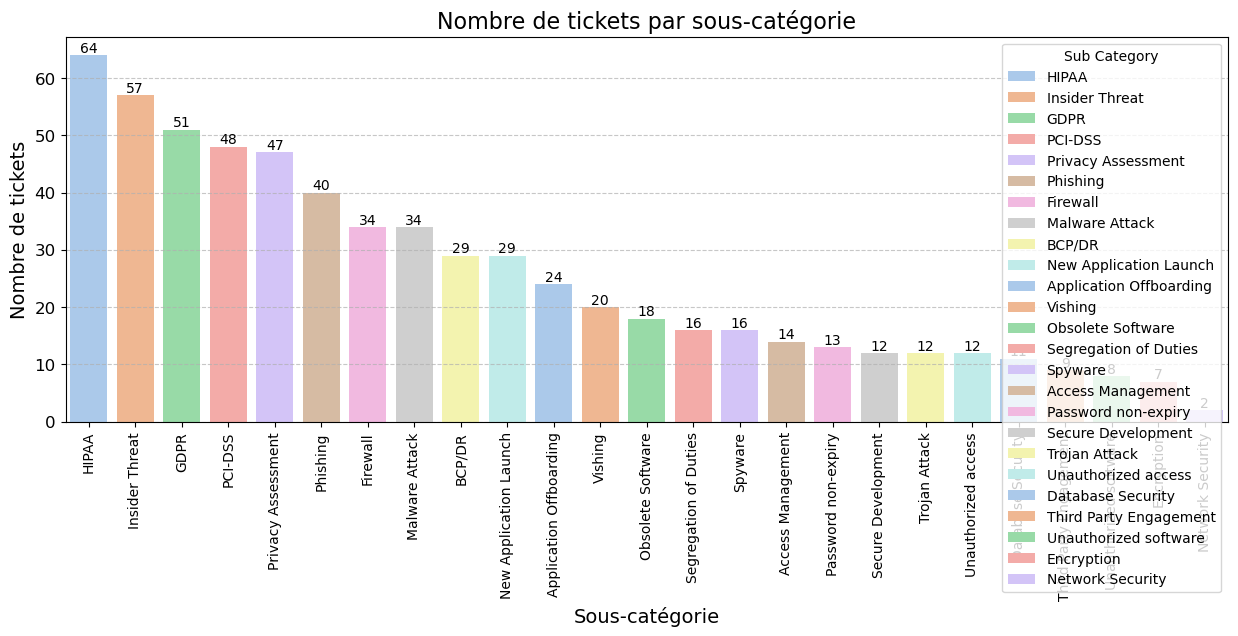

In [10]:
# Supposons que subcategory_group est le DataFrame regroupé
subcategory_group = df.groupby('Sub Category')['Ticket No'].count().sort_values(ascending=False).reset_index()

# Utilisation d'une palette de couleurs personnalisée
custom_colors = sns.color_palette('pastel', n_colors=len(subcategory_group))

# Tracé avec Seaborn
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='Sub Category', y='Ticket No', data=subcategory_group, hue='Sub Category', palette=custom_colors, dodge=False)

# Ajout d'étiquettes aux barres
for index, row in subcategory_group.iterrows():
    ax.text(row.name, row['Ticket No'], row['Ticket No'], ha='center', va='bottom', fontsize=10)

# Personnalisation du graphique
plt.title("Nombre de tickets par sous-catégorie", fontsize=16)
plt.xlabel("Sous-catégorie", fontsize=14)
plt.ylabel("Nombre de tickets", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Affichage des tickets par équipe </b>
</div>
</br>


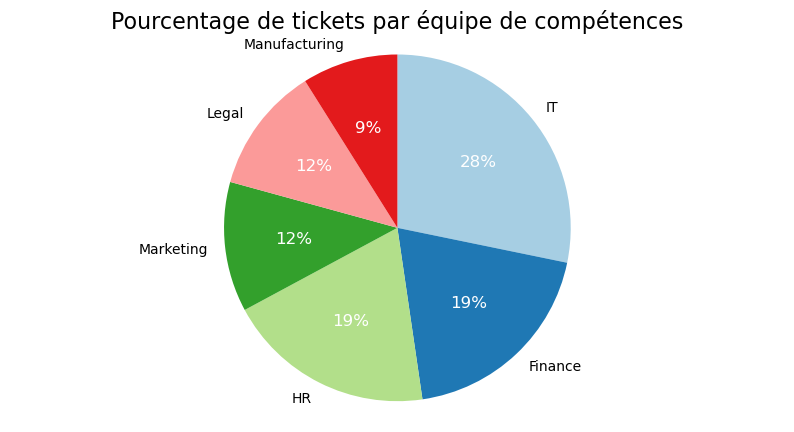

In [11]:
# Supposons que team_group est le DataFrame regroupé
team_group = df.groupby('Skill Team')['Ticket No'].count().sort_values(ascending=False).reset_index()

# Tracé du graphique circulaire
plt.figure(figsize=(10, 5))
colors = plt.cm.Paired.colors
_, _, autotexts = plt.pie(team_group['Ticket No'], labels=team_group['Skill Team'], autopct="%.0f%%", colors=colors, startangle=90, counterclock=False)
plt.title("Pourcentage de tickets par équipe de compétences", fontsize=16)

# Ajout de labels pour chaque tranche
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

# Affichage d'un cercle parfait
plt.axis('equal')

# Affichage du graphique
plt.show()

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Affichage des tickets par mois </b>
</div>
</br>


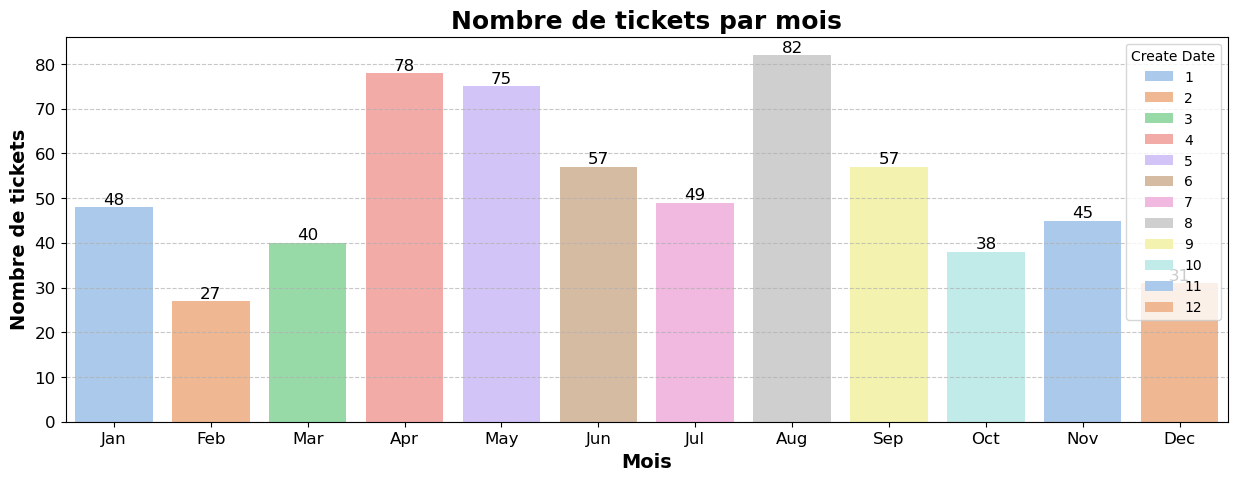

In [12]:
# Grouper par mois
month_group = df.groupby(df['Create Date'].dt.month)['Ticket No'].count().reset_index()

# Utilisation d'une palette de couleurs personnalisée
custom_colors = sns.color_palette('pastel', n_colors=len(month_group))

# Tracé avec Seaborn
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=month_group, x='Create Date', y='Ticket No', hue='Create Date', palette=custom_colors, dodge=False)

# Ajout d'étiquettes aux barres
for index, row in month_group.iterrows():
    ax.text(row.name, row['Ticket No'], row['Ticket No'], ha='center', va='bottom', fontsize=12)

# Personnalisation du graphique
plt.title('Nombre de tickets par mois', fontsize=18, fontweight='bold')
plt.xlabel('Mois', fontsize=14, fontweight='bold')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.ylabel('Nombre de tickets', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()


In [13]:
# Création de la table pivot
state_pivot = pd.pivot_table(data=df, index='State', values='Ticket No', aggfunc='count').sort_values('Ticket No', ascending=False)

# Application du style de gradient de couleur
styled_pivot = state_pivot.style.background_gradient(cmap='Blues').set_properties(**{'font-size': '12pt', 'font-family': 'Arial', 'text-align': 'center'})

styled_pivot.set_caption('Nombre de tickets par état').set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '16pt'), ('font-weight', 'bold')]}])

# Affichage de la table stylée
styled_pivot


,Ticket No
State,
California,131
New York,56
Florida,47
Texas,38
Virginia,38
Illinois,25
Utah,21
Georgia,19
New Jersey,19


</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Affichage des tickets par "Assignee" </b>
</div>
</br>

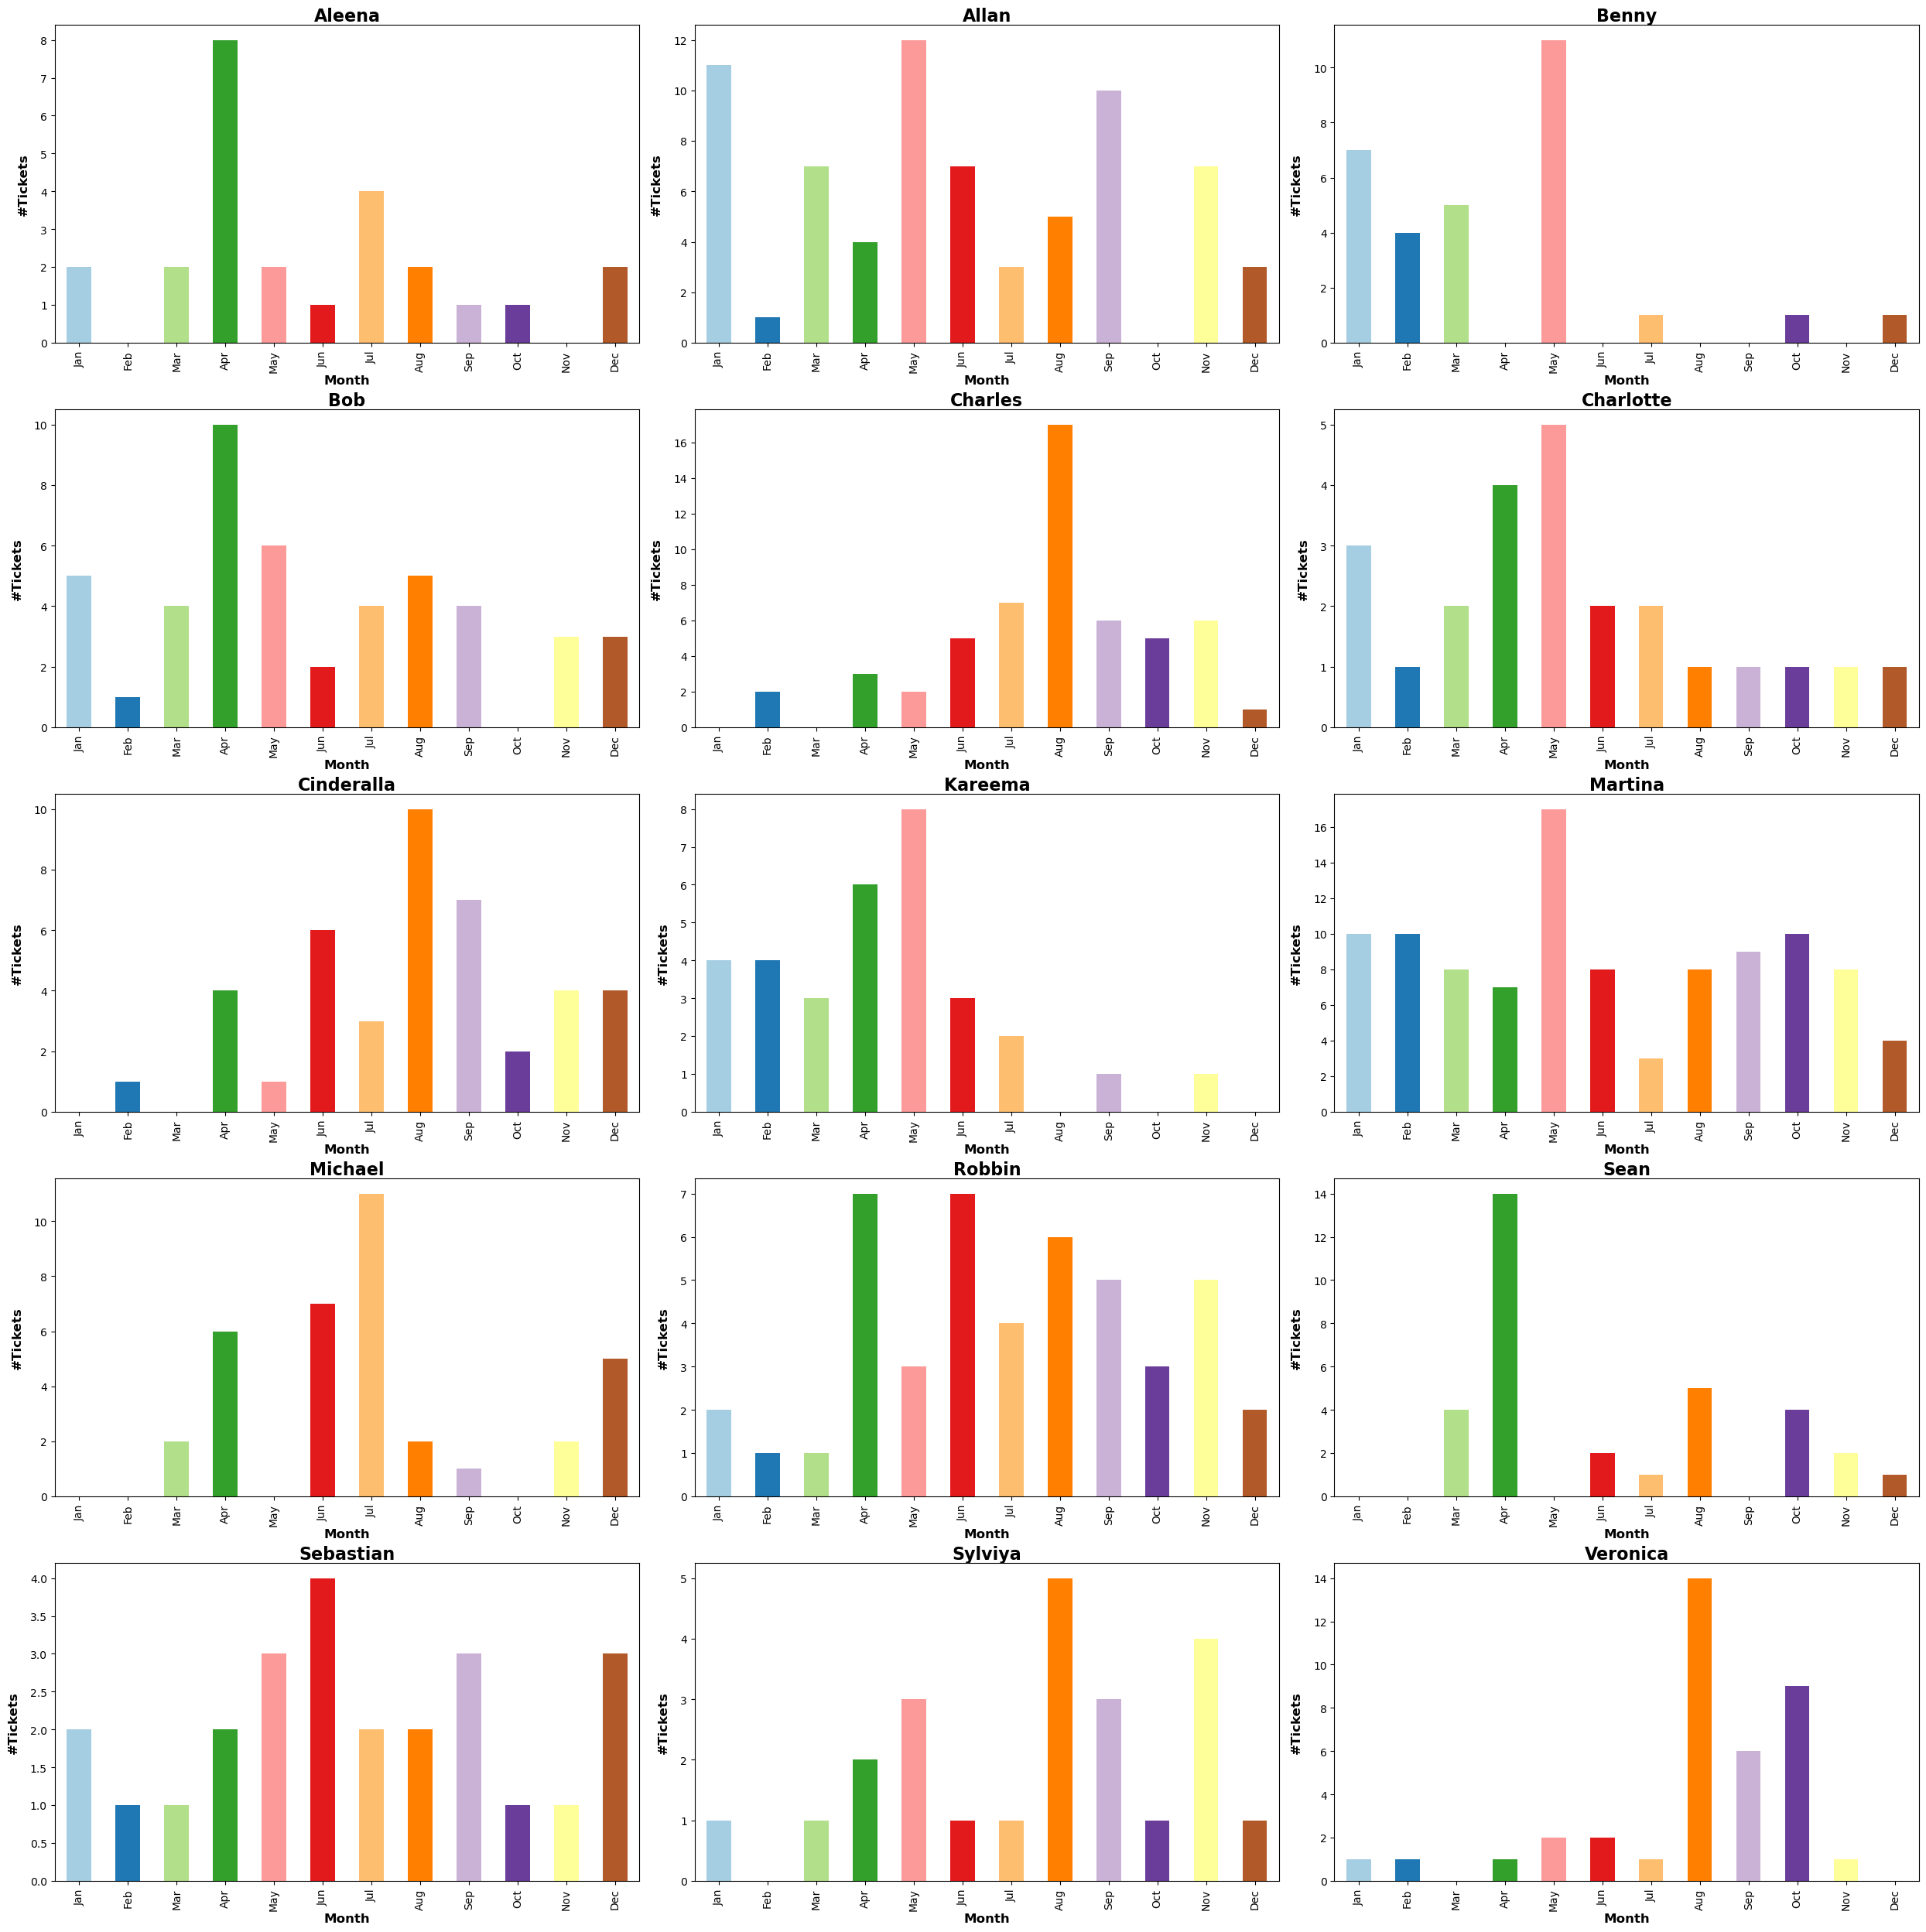

In [14]:
# Création de la table pivot
assignee_pivot = pd.pivot_table(data=df, index=df['Create Date'].dt.month, columns='Assignee', values='Ticket No', aggfunc='count').fillna(0)

# Obtention des noms des assignés à partir de la table pivot
assignees = assignee_pivot.columns

# Définition de la taille de la figure
plt.rcParams['figure.figsize'] = (25, 25)

# Définition d'une palette de couleurs personnalisée
colors = sns.color_palette('Paired', len(assignees))

# Boucle pour tracer les sous-graphiques avec des couleurs personnalisées
for i, assignee in enumerate(assignees, 1):
    ax = plt.subplot(5, 3, i)
    assignee_pivot[assignee].plot(kind='bar', color=colors)
    plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_title(assignee, fontsize=16, fontweight='bold', ha='center', va='center')
    ax.set_xlabel('Month', fontsize=12, fontweight='bold', labelpad=10)
    ax.set_ylabel('#Tickets', fontsize=12, fontweight='bold', labelpad=10)
    ax.title.set_position([0.5, 1.05])
    ax.xaxis.set_label_coords(0.5, -0.1)

# Affichage des sous-graphiques
plt.tight_layout()
plt.show()



</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 20px;">
    <b>Conclusion:  </b>
</div>
</br>

<div>
<p> Après avoir consulté la dataset, on remarque que certains employés gèrent un nombre inférieur de tickets par rapport aux autres ce qui pourrait signaler la nécessité de  réévaluer la répartition des charges de travail. 
    
On remarque aussi une attention particulière aux sous-catégories de "HIPAA" et "Incider Threat" ou catégories spécifiques comme "Data Privacy" et "Cyber Consultation" par rapport aux autres indiquent une demande croissante dans ces domaines, nécessitant une analyse approfondie pour identifier les problèmes et mettre en œuvre des solutions ciblées. Ces deux analyses offrent des opportunités d'amélioration et d'optimisation des processus pour renforcer la productivité de l'équipe et améliorer la qualité globale du service client. </p>
</div>

</br>
<div style="font-family: Arial; color: black ; font-size: 20px;">
    <b>On s'interesse à la visualisation et l'analyse de la dataset "Global Salary Data"  </b>
</div>
</br>


In [15]:
df = pd.read_csv("salary_data.csv")
df

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,853.740000,1001.150000,252.530000,4460.970000
1,Aland Islands,Europe,Monthly,3319.240000,3858.350000,972.520000,17124.740000
2,Albania,Europe,Monthly,832.840000,956.920000,241.220000,4258.490000
3,Algeria,Africa,Monthly,1148.840000,1308.810000,330.110000,5824.180000
4,American Samoa,Oceania,Monthly,1390.000000,1570.000000,400.000000,6980.000000
...,...,...,...,...,...,...,...
216,Virgin Islands (US),North America,Monthly,2380.000000,2710.000000,680.000000,12000.000000
217,Western Sahara,Africa,Monthly,908.560000,1011.670000,254.860000,4503.890000
218,Yemen,Asia,Monthly,120.980000,133.360000,33.620000,594.930000
219,Zambia,Africa,Monthly,0.261335,0.285524,0.072092,1.271103


In [16]:
df.describe()

,median_salary,average_salary,lowest_salary,highest_salary
count,221.000000,221.000000,221.000000,221.000000
mean,1762.631906,1982.339812,502.783204,8802.165619
std,1634.708716,1835.429193,470.073328,8140.210641
min,0.261335,0.285524,0.072092,1.271103
25%,567.210000,651.000000,163.930000,2900.480000
50%,1227.460000,1344.230000,339.450000,5974.360000
75%,2389.010000,2740.000000,690.000000,12050.740000
max,9836.070000,11292.900000,2850.270000,50363.930000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    221 non-null    object 
 1   continent_name  221 non-null    object 
 2   wage_span       221 non-null    object 
 3   median_salary   221 non-null    float64
 4   average_salary  221 non-null    float64
 5   lowest_salary   221 non-null    float64
 6   highest_salary  221 non-null    float64
dtypes: float64(4), object(3)
memory usage: 12.2+ KB


In [18]:
#Verifier que les colonnes sont correctes
df.isnull().sum()

country_name      0
continent_name    0
wage_span         0
median_salary     0
average_salary    0
lowest_salary     0
highest_salary    0
dtype: int64


</br>
<div style="font-family: Arial; color: black ; font-size: 15px;">
    Après avoir inspecté notre ensemble de données, nous constatons qu'il ne présente pas de valeurs manquantes ni d'irrégularités qui nécessiteraient un nettoyage approfondi, ce qui nous permet de procéder directement à l'exploration et à l'analyse des données.
</div>
</br>

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Affichage des salaires par continent et par pays </b>
</div>
</br>

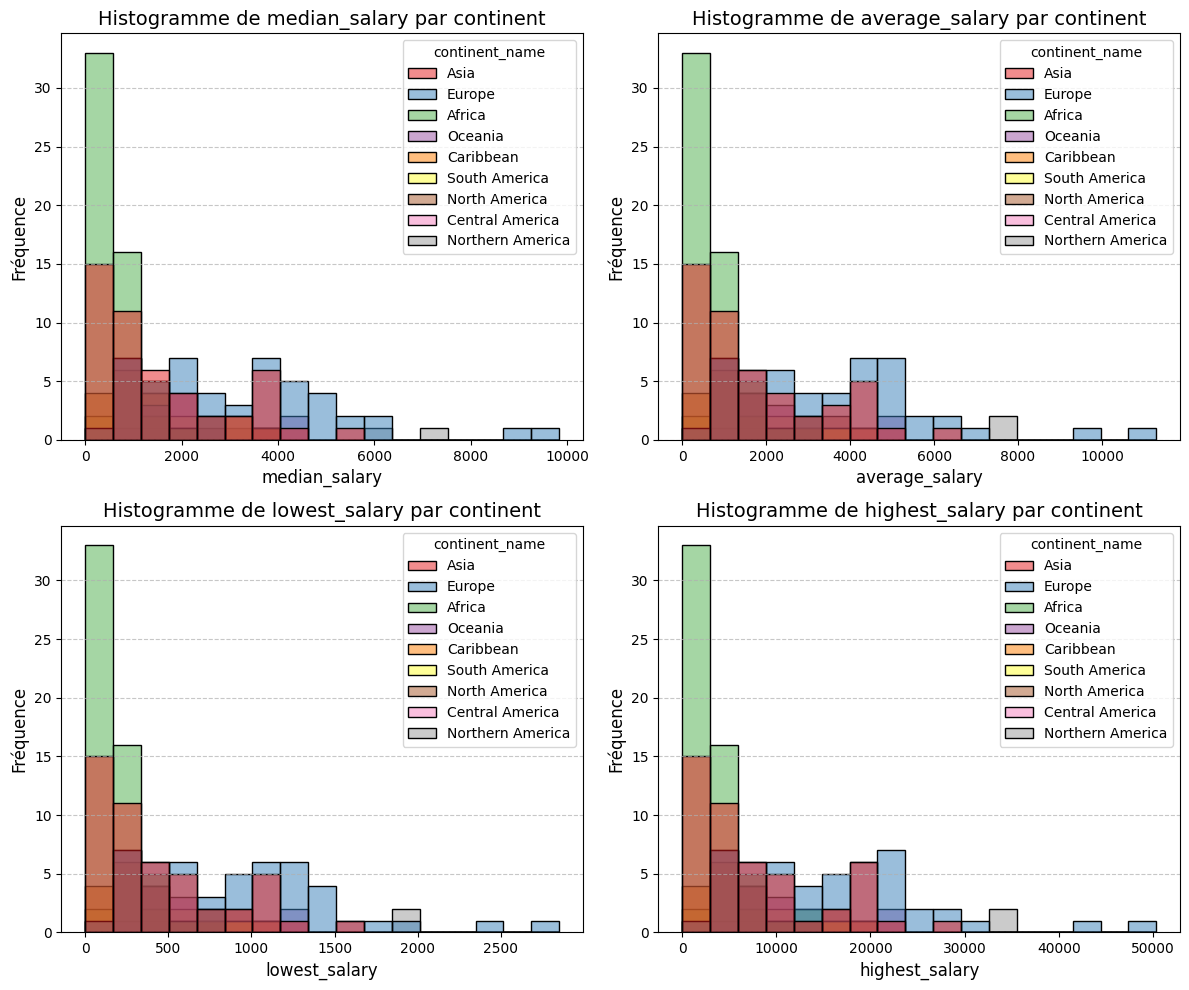

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
num_col1=['median_salary', 'average_salary', 'lowest_salary',
       'highest_salary']
# Personnalisation de la palette de couleurs
palette = 'Set1'

for i, ax in enumerate(axes.flatten()):
    sns.histplot(data=df, x=num_col1[i], hue='continent_name', ax=ax, palette=palette, kde=False)
    ax.set_title(f'Histogramme de {num_col1[i]} par continent', fontsize=14)
    ax.set_xlabel(num_col1[i], fontsize=12)
    ax.set_ylabel('Fréquence', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [37]:
import plotly.express as px

fig1 = px.bar(df, x = "country_name", y = "highest_salary", color='country_name',
             width=1100, height=800, title="Max Salaire par Pays", )
fig1.show()


In [34]:
msc10 = df.sort_values(by = "lowest_salary", ascending = True).head(10)

fig3 = px.bar(msc10, x = 'country_name', y = 'lowest_salary', color ='lowest_salary', title='Les 10 Salaires les plus basses')
fig3.show()


</br>
<div style="font-family: Arial; color: black ; font-size: 15px;">
   On constate que les salaires les plus basses se trouvent dans l'Afrique et que les hautes salaires sont dans l'Europe.
    Une analyse plus précise sur les salaires maximales, nous indiquent que les pays comme Swizerland et Guernesey sont mieux payés et que les pays comme Zambia, Mauritania et Sudan sont les moins rénumérés
</div>
</br>

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Détection des données redondantes:</b>
</div>
</br>

In [22]:
# Recherchez les doublons dans le DataFrame
search = pd.DataFrame.duplicated(df)

# Affichez le DataFrame d'origine
print("Data : \n")
print(df)

# Affichez les lignes marquées comme des doublons (True)
print("\n Les données doublons \n")
print(search[search == True])

# Affichez le nombre total de doublons
print(search.sum())


Data : 

            country_name continent_name wage_span  median_salary  \
0            Afghanistan           Asia   Monthly     853.740000   
1          Aland Islands         Europe   Monthly    3319.240000   
2                Albania         Europe   Monthly     832.840000   
3                Algeria         Africa   Monthly    1148.840000   
4         American Samoa        Oceania   Monthly    1390.000000   
..                   ...            ...       ...            ...   
216  Virgin Islands (US)  North America   Monthly    2380.000000   
217       Western Sahara         Africa   Monthly     908.560000   
218                Yemen           Asia   Monthly     120.980000   
219               Zambia         Africa   Monthly       0.261335   
220             Zimbabwe         Africa   Monthly     555.402040   

     average_salary  lowest_salary  highest_salary  
0       1001.150000     252.530000     4460.970000  
1       3858.350000     972.520000    17124.740000  
2        956.92

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Détection et traitement des données manquantes (missing data):</b>
</div>
</br>

In [23]:
# Visualiser les données manquantes
print("Visualiser les données manquantes : True signifie la détection de données manquantes")
print(df.isnull())

# Isoler les données manquantes
print("Isoler les données manquantes")
missing_data = df[df.isnull().any(axis=1)]
print(missing_data)

# Imprimer le nombre de données manquantes par colonne et le nombre total
print("Nombre de données manquantes par colonne :")
print(df.isnull().sum())
print("Nombre total de données manquantes :")
print(df.isnull().sum().sum())

Visualiser les données manquantes : True signifie la détection de données manquantes
     country_name  continent_name  wage_span  median_salary  average_salary  \
0           False           False      False          False           False   
1           False           False      False          False           False   
2           False           False      False          False           False   
3           False           False      False          False           False   
4           False           False      False          False           False   
..            ...             ...        ...            ...             ...   
216         False           False      False          False           False   
217         False           False      False          False           False   
218         False           False      False          False           False   
219         False           False      False          False           False   
220         False           False      False  

</br>

<div style="font-family: Arial; color: black ; font-size: 15px;">
Puisque la dataset ne contient ni de données manquantes, ni de redondance, on procède à la manipulation des données pour en extraire une analyse approfondie.
</div>

</br>

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Sorting et Shuffling :</b>
</div>
</br>

In [24]:
# Afficher le DataFrame initial
print("Le jeu de données initial :")
print(df)

# Trier le jeu de données selon la colonne 'A' de manière croissante
print("Le jeu de données est trié selon la colonne 'Continent_Name'")
df = df.sort_values(by='continent_name', ascending=True)
print(df)

# Réinitialiser l'indice du DataFrame
df = df.reset_index(drop=True)


# Mélanger le jeu de données
print("Le jeu de données est mélangé")
index = df.index.tolist()
np.random.shuffle(index)
df = df.iloc[index]

# Afficher le DataFrame avec un nouvel indice
print("DataFrame après mélange et réinitialisation de l'indice :")
print(df)


Le jeu de données initial :
            country_name continent_name wage_span  median_salary  \
0            Afghanistan           Asia   Monthly     853.740000   
1          Aland Islands         Europe   Monthly    3319.240000   
2                Albania         Europe   Monthly     832.840000   
3                Algeria         Africa   Monthly    1148.840000   
4         American Samoa        Oceania   Monthly    1390.000000   
..                   ...            ...       ...            ...   
216  Virgin Islands (US)  North America   Monthly    2380.000000   
217       Western Sahara         Africa   Monthly     908.560000   
218                Yemen           Asia   Monthly     120.980000   
219               Zambia         Africa   Monthly       0.261335   
220             Zimbabwe         Africa   Monthly     555.402040   

     average_salary  lowest_salary  highest_salary  
0       1001.150000     252.530000     4460.970000  
1       3858.350000     972.520000    17124.74000

</br>
<div style="font-family: Arial; color: black ; font-size: 15px;">
Ce code illustre l'importance de l'ordre des données dans l'analyse de données et l'apprentissage automatique. En triant les données par la colonne 'continent_name', on peut garantir des résultats plus précis pour les modèles d'apprentissage automatique, éliminant tout biais potentiel dû à l'ordre initial des données. </div>
</br>

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Standardisation:</b>
</div>
</br>

In [25]:
from sklearn.preprocessing import StandardScaler

# Afficher le jeu de données initial
print("Data avant standardisation :")
print(df)

# Sélectionner les colonnes à standardiser
columns_to_standardize = ["median_salary", "average_salary", "lowest_salary", "highest_salary"]

print("Colonnes à standardiser :")
print(columns_to_standardize)

# Sélectionner et standardiser les colonnes spécifiques
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Afficher les statistiques après la standardisation
print('\n********** Standardisation *********\n')
print('Moyenne et écart type après la standardisation :')
print(df[columns_to_standardize].mean())
print(df[columns_to_standardize].std())

# Afficher le jeu de données après la standardisation
print("\nData après la standardisation Z-Score:")
print(df)


Data avant standardisation :
            country_name   continent_name wage_span  median_salary  \
78              Pakistan             Asia   Monthly      245.34000   
171       Czech Republic           Europe   Monthly     2310.03000   
129           Costa Rica  Central America   Monthly     4016.06000   
190       American Samoa          Oceania   Monthly     1390.00000   
24                 Ghana           Africa   Monthly      373.82000   
..                   ...              ...       ...            ...   
124          El Salvador  Central America   Monthly     1470.00000   
155            Lithuania           Europe   Monthly      903.87466   
116  Trinidad and Tobago        Caribbean   Monthly     1258.11000   
33                 Libya           Africa   Monthly      417.18000   
166        Liechtenstein           Europe   Monthly     5224.04000   

     average_salary  lowest_salary  highest_salary  
78        284.90000       71.83000       1266.6100  
171      2653.06000     

</br>
<div style="font-family: Arial; color: black ; font-size: 15px;">
     Ce code effectue la standardisation des colonnes spécifiques du DataFrame. Contrairement à la normalisation, la standardisation utilise la méthode Z-Score, qui transforme les données en ajustant la moyenne à zéro et l'écart type à un et elle est moins sensible aux valeurs aberrantes (outliers) que la normalisation min-max, car elle se base sur des statistiques robustes telles que la moyenne et l'écart type. Cela permet de conserver la forme de la distribution des données et d'éviter que les valeurs aberrantes n'affectent considérablement les résultats.
</div>
</br>

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Data encoding:</b>
</div>
</br>

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le LabelEncoder
label_encoder = LabelEncoder()

# Transformer les données catégoriques en données numériques pour les colonnes 'country_name' et 'continent_name'
df['country_name_encoded'] = label_encoder.fit_transform(df['country_name'])
df['continent_name_encoded'] = label_encoder.fit_transform(df['continent_name'])

# Afficher la DataFrame avec les données encodées
print(df[['country_name', 'country_name_encoded', 'continent_name', 'continent_name_encoded']])


            country_name  country_name_encoded   continent_name  \
78              Pakistan                   152             Asia   
171       Czech Republic                    52           Europe   
129           Costa Rica                    47  Central America   
190       American Samoa                     4          Oceania   
24                 Ghana                    75           Africa   
..                   ...                   ...              ...   
124          El Salvador                    60  Central America   
155            Lithuania                   115           Europe   
116  Trinidad and Tobago                   200        Caribbean   
33                 Libya                   113           Africa   
166        Liechtenstein                   114           Europe   

     continent_name_encoded  
78                        1  
171                       4  
129                       3  
190                       7  
24                        0  
..             

</br>
<div style="font-family: Arial; color: black ; font-size: 15px;">
     Ce code permet de transformer les données catégoriques des colonnes 'country_name' et 'continent_name' en données numériques à l'aide du LabelEncoder. Cette étape est essentielle car les algorithmes d'apprentissage automatique nécessitent des données numériques pour bien fonctionner.
</div>
</br>

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b> Discrétisation des données:</b>
</div>
</br>

In [30]:
# Calculer la moyenne des valeurs numériques dans votre DataFrame 'df'
print("Moyenne des valeurs numériques :")
print(df.mean())

# Calculer la médiane des valeurs numériques dans votre DataFrame 'df'
print("\nMédiane des valeurs numériques :")
print(df.median())

# Discrétisation basée sur des effectifs égaux (quantiles) pour votre DataFrame 'df'
quantiles = np.array([0, 0.25, 0.50, 0.75, 1])
df_binned = df.quantile(quantiles)

# Afficher les données discrétisées pour votre DataFrame 'df'
print("\nDiscrétisation basée sur des effectifs égaux (quantiles) :")
print(df_binned)

# Calculer la fréquence pour chaque variable catégorique dans votre DataFrame 'df'
print("\nFréquence dans chaque catégorie :")
frequency = df['continent_name'].value_counts()  # Changer 'continent_name' par la colonne souhaitée
print(frequency)


Moyenne des valeurs numériques :
median_salary             5.425524e-17
average_salary           -8.037814e-17
lowest_salary             1.748224e-16
highest_salary           -1.768319e-16
country_name_encoded      1.100000e+02
continent_name_encoded    2.660633e+00
dtype: float64

Médiane des valeurs numériques :
median_salary              -0.328124
average_salary             -0.348452
lowest_salary              -0.348252
highest_salary             -0.348176
country_name_encoded      110.000000
continent_name_encoded      2.000000
dtype: float64

Discrétisation basée sur des effectifs égaux (quantiles) :
      median_salary  average_salary  lowest_salary  highest_salary  \
0.00      -1.080542       -1.082338      -1.071859       -1.083617   
0.25      -0.732935       -0.727003      -0.722488       -0.726650   
0.50      -0.328124       -0.348452      -0.348252       -0.348176   
0.75       0.384044        0.413734       0.399176        0.399983   
1.00       4.949974        5.084204  

C:\Users\dell\AppData\Local\Temp\ipykernel_2024\1316887760.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\dell\AppData\Local\Temp\ipykernel_2024\1316887760.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b> Réduction basée sur une transformation des données (PCA):</b>
</div>
</br>

Données réduites en 3 dimensions:
             PC1        PC2        PC3         colors
0   -4549.289909  32.067424  18.856546           Asia
1    8684.236871  96.019454  55.799407         Europe
2   -4757.003538  15.392464   9.078216         Europe
3   -3119.028187  14.638749   6.767757         Africa
4   -1907.793743   5.428998   4.306801        Oceania
..           ...        ...        ...            ...
216  3341.784223  20.448760  12.387960  North America
217 -4495.353993  -5.870247  -5.941497         Africa
218 -8584.436359  -5.454133  -0.341884           Asia
219 -9205.592259  -4.604118   1.310717         Africa
220 -6405.438407 -18.783695 -10.745334         Africa

[221 rows x 4 columns]
Données réduites en 2 dimensions:
             PC1        PC2         colors
0   -4549.289909  32.067424           Asia
1    8684.236871  96.019454         Europe
2   -4757.003538  15.392464         Europe
3   -3119.028187  14.638749         Africa
4   -1907.793743   5.428998        Oceania
..

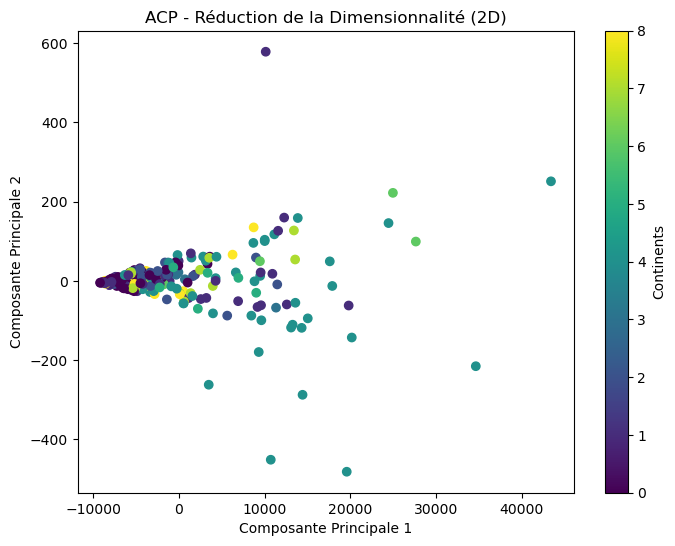

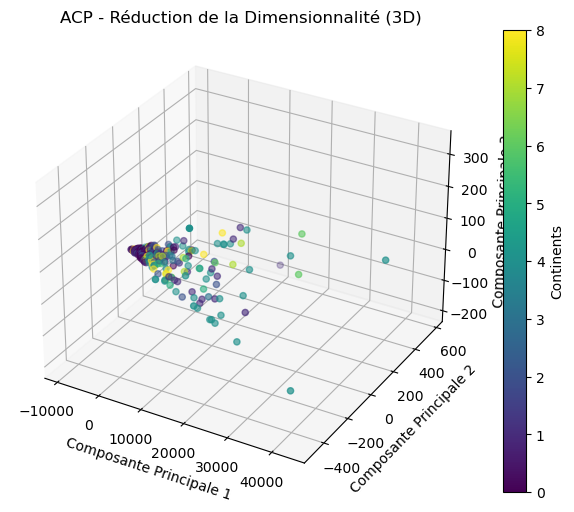

In [39]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Utiliser PCA sur votre DataFrame 'df'
pca = PCA(n_components=3)  # Réduire les données à 3 dimensions
X_reduced_3d = pca.fit_transform(df.drop(['country_name', 'continent_name', 'wage_span'], axis=1))

# Réduire les données à 2 dimensions avec PCA
pca_2d = PCA(n_components=2)  # Réduire les données à 2 dimensions
X_reduced_2d = pca_2d.fit_transform(df.drop(['country_name', 'continent_name', 'wage_span'], axis=1))

# Créer un DataFrame avec les données réduites en 3 dimensions
dataframe_reduced_3d = pd.DataFrame(X_reduced_3d, columns=['PC1', 'PC2', 'PC3'])

# Créer un DataFrame avec les données réduites en 2 dimensions
dataframe_reduced_2d = pd.DataFrame(X_reduced_2d, columns=['PC1', 'PC2'])

# Ajouter une colonne de couleurs basée sur une caractéristique spécifique de votre DataFrame pour distinguer visuellement les points
dataframe_reduced_2d['colors'] = df['continent_name']
dataframe_reduced_3d['colors'] = df['continent_name']

# Afficher les données réduites en 3 dimensions
print("Données réduites en 3 dimensions:")
print(dataframe_reduced_3d)

# Afficher les données réduites en 2 dimensions
print("Données réduites en 2 dimensions:")
print(dataframe_reduced_2d)
# Tracer un graphique des données réduites en 2 dimensions avec des couleurs distinctes
plt.figure(figsize=(8, 6))
plt.scatter(dataframe_reduced_2d['PC1'], dataframe_reduced_2d['PC2'], c=dataframe_reduced_2d['colors'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('ACP - Réduction de la Dimensionnalité (2D)')
plt.colorbar(label='Continents')
plt.show()

# Tracer un graphique des données réduites en 3 dimensions avec des couleurs distinctes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(dataframe_reduced_3d['PC1'], dataframe_reduced_3d['PC2'], dataframe_reduced_3d['PC3'], c=dataframe_reduced_3d['colors'].astype('category').cat.codes, cmap='viridis')
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
plt.title('ACP - Réduction de la Dimensionnalité (3D)')
plt.colorbar(scatter, label='Continents')
plt.show()
